In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV , train_test_split , cross_val_score , KFold
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
df.columns = ['preg' , 'glucose' , 'BP' ,'skin' , 'insulin' ,'BMI','DPF' , 'age','class']

In [4]:
df.head()

,preg,glucose,BP,skin,insulin,BMI,DPF,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


**Questions**


1- At what age do people usually get diabetes?

2- At what age does blood pressure increase

3- At what age does teh glucose increase?

4- Is there a relationship between insulin intake and age?

5- What is the relation between BMI and the number of getting pregnant?

6- What is the relation between blood pressure and the number of getting pregnant?

7- Can we say the more you get pregnant the more change is to have higher glucose?

8- Is having a high weigh has an influence on high blood pressure?

9- Can we say the high number of pregnancies can lead to having a high chance of getting diabetes?

10- can we say the older you are the more is the risk to get diabetes?

In [5]:
df.shape

(767, 9)

In [6]:
df.describe()

,preg,glucose,BP,skin,insulin,BMI,DPF,age,class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['insulin']

0        0
1        0
2       94
3      168
4        0
      ... 
762    180
763      0
764    112
765      0
766      0
Name: insulin, Length: 767, dtype: int64

The dataset has no missing values. However, according to domain knowledge, there are inconsistent values for the attributes: glucose, blood pressure, skin fold thickness, insulin, and BMI, whereby zero values are not within the normal range and are therefore inaccurate.

In [8]:
def null_fun (x):
    df[x] = df[x].replace(0,np.nan)

In [9]:
null_cols = ['glucose' , 'BP' , 'skin' , 'insulin' , 'BMI']
for col in null_cols:
    null_fun(col)

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'tw

# dealing with outliers 

Text(0, 0.5, 'Features')

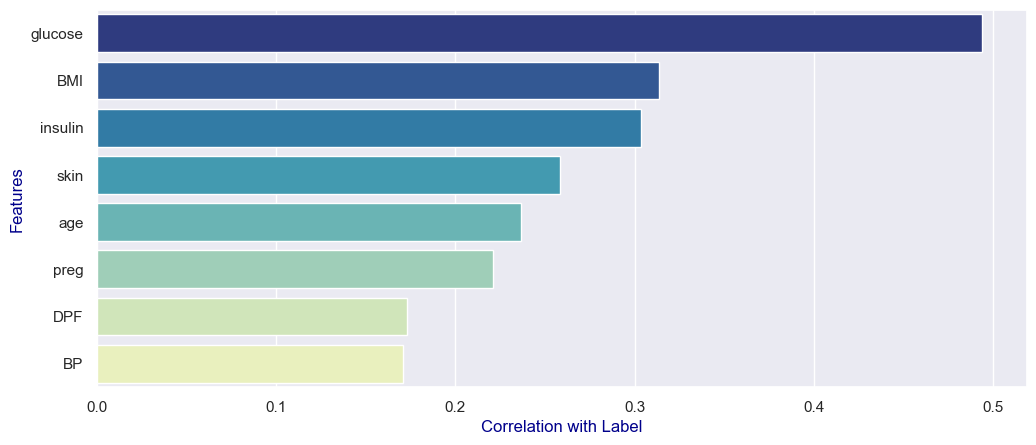

In [10]:
corr_df = pd.DataFrame(df.corr()['class'].sort_values(ascending=False))
corr_df.drop('class',axis=0,inplace=True)
sns.set()
plt.figure(figsize=(12,5),dpi=100)
sns.barplot(x= corr_df['class'] ,y= corr_df.index , palette = 'YlGnBu_r')
plt.xlabel('Correlation with Label' , color = 'darkblue')
plt.ylabel('Features' , color = 'darkblue')

In [11]:
corrmat = df.corr()

In [12]:
mask = np.triu(np.ones_like(corrmat, dtype=bool))

Text(0.5, 1.0, 'Heat map')

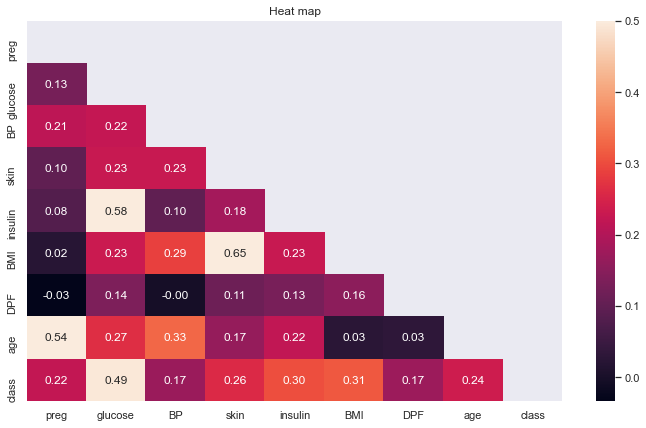

In [13]:
plt.figure(figsize = (12,7))
sns.heatmap(df.corr(), annot = True , mask = mask , fmt = '.2f' , cmap = 'rocket' , vmax = 0.5)
plt.title('Heat map')

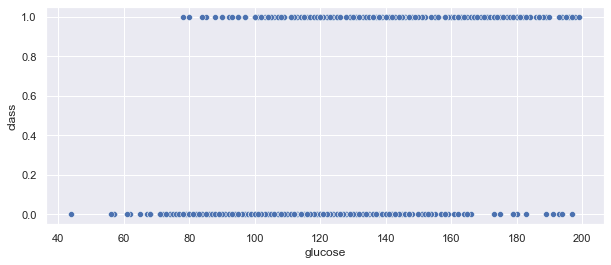

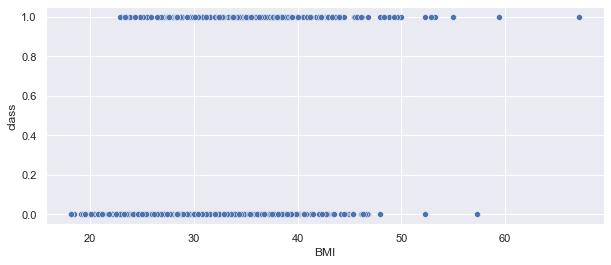

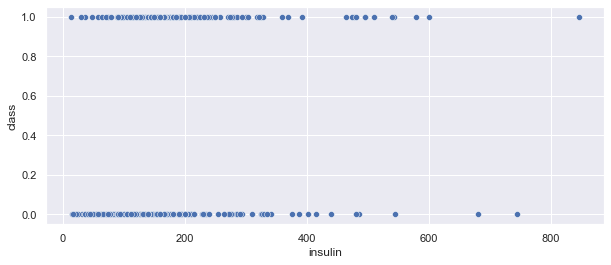

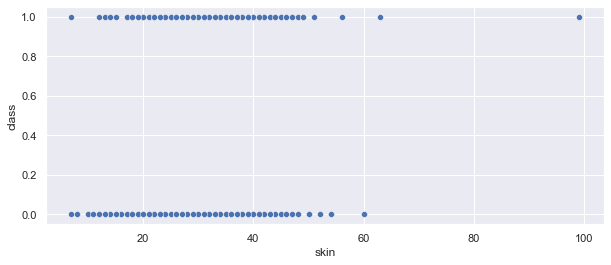

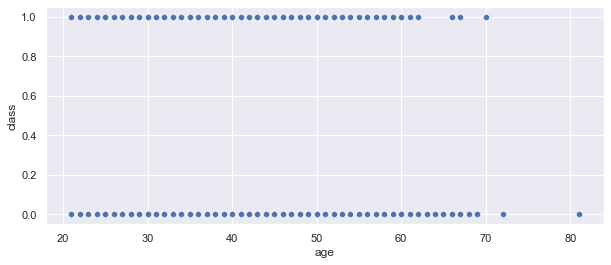

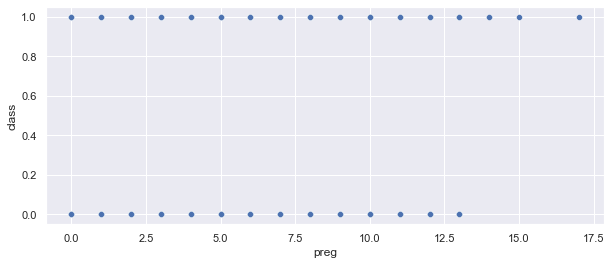

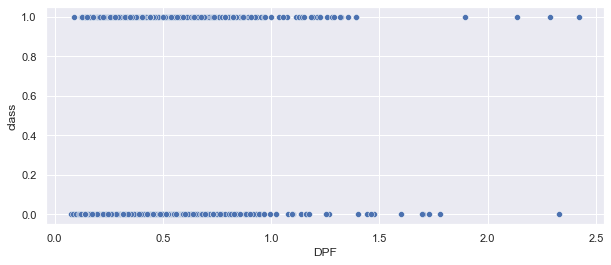

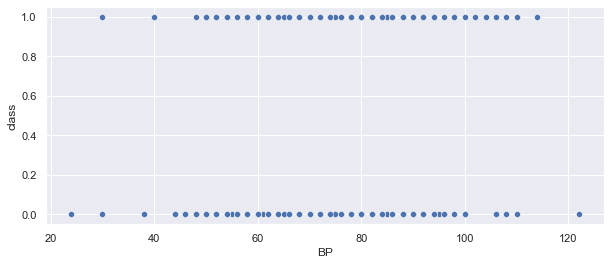

In [14]:
col_name=['glucose', 'BMI', 'insulin', 'skin', 'age', 'preg', 'DPF', 'BP']
def scatterplot(col):
    plt.figure(figsize=(10,4))
    sns.scatterplot(data=df,x=col,y='class')
for col in col_name:
    scatterplot(col)
    

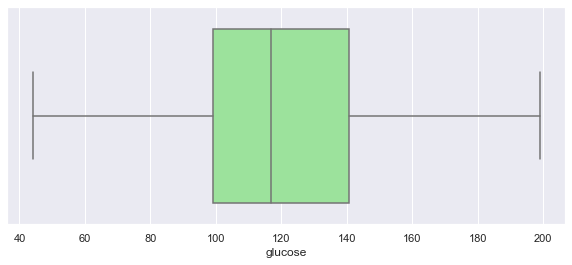

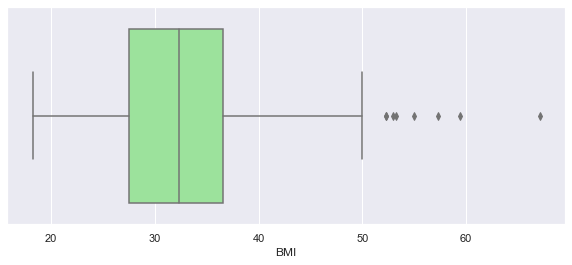

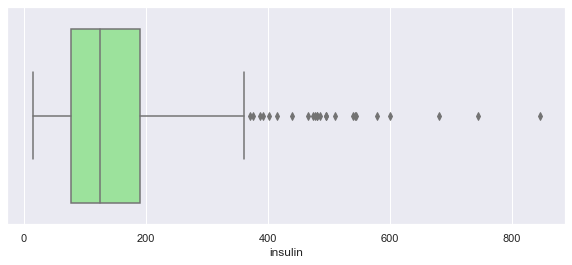

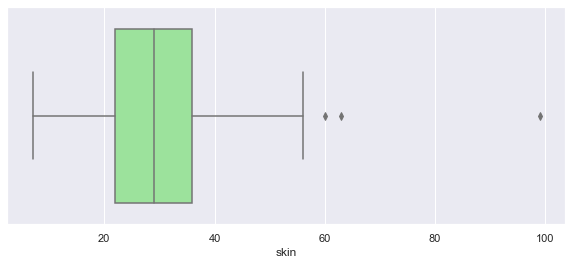

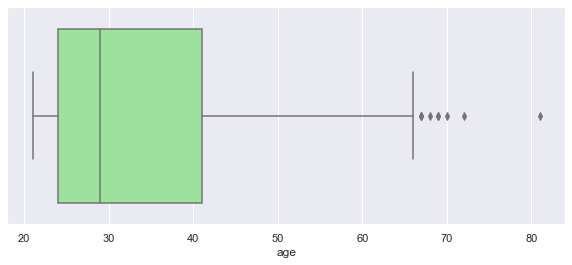

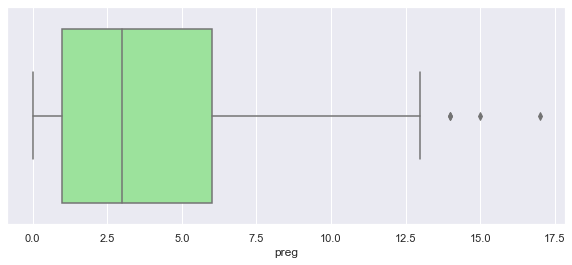

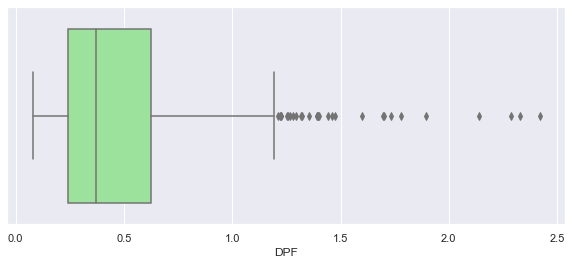

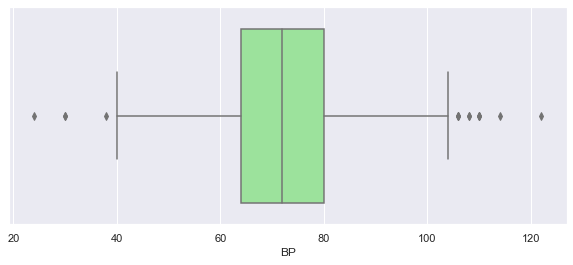

In [15]:
def boxplot(col):
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[col] ,  color = 'lightgreen')
for col in col_name:
    boxplot(col)

df.drop(df[df['BMI']>55].index,axis=0,inplace=True)

df.drop(df[df['insulin']>550].index,axis=0,inplace=True)

df.drop(df[df['preg']>=14].index , axis=0 , inplace = True)

In [16]:
df.shape

(767, 9)

# Changing other outliers to missing value

In [17]:
df.corr()['class'].abs().sort_values(ascending = False)

class      1.000000
glucose    0.493950
BMI        0.313773
insulin    0.303454
skin       0.258582
age        0.236417
preg       0.221087
DPF        0.173245
BP         0.170874
Name: class, dtype: float64

In [18]:
df

,preg,glucose,BP,skin,insulin,BMI,DPF,age,class
0,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
1,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
763,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
764,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
765,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


<AxesSubplot:xlabel='insulin', ylabel='class'>

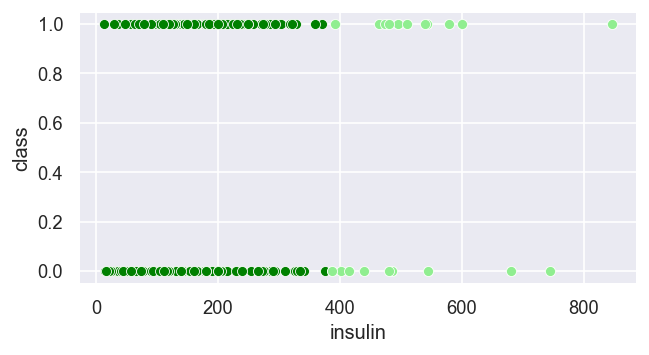

In [19]:
plt.figure(figsize = (6,3),dpi = 120)
sns.scatterplot(data = df , x= 'insulin' , y = 'class' , color = 'green')
sns.scatterplot(data = df[df['insulin']>380] ,x = 'insulin' ,y = 'class' , color = 'lightgreen')

In [20]:
df['insulin'] = df['insulin'].apply(lambda x : round(df[df['insulin']<350]['insulin'].mean(),0) if x>380 else x)

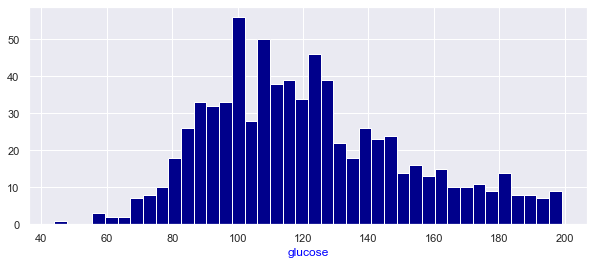

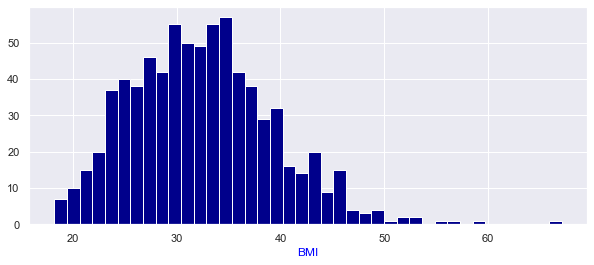

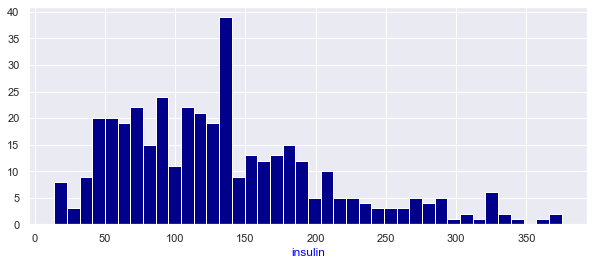

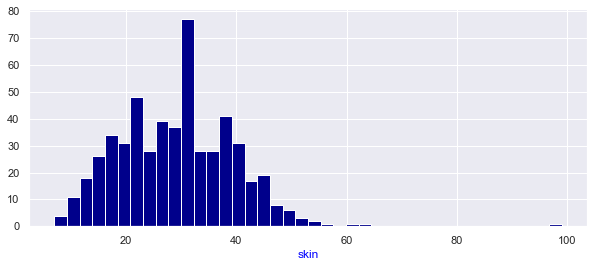

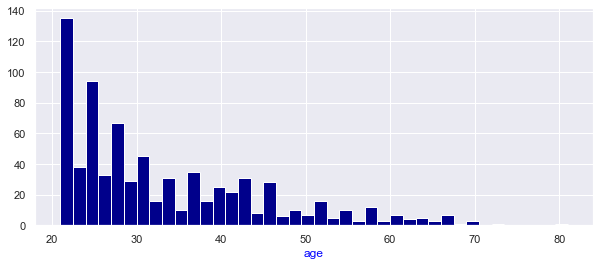

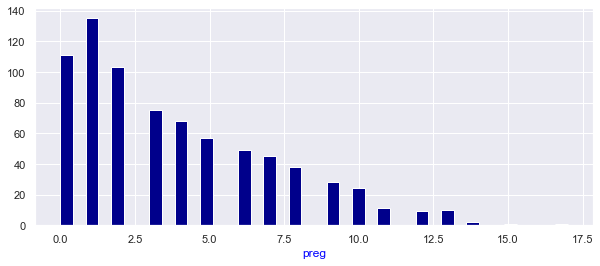

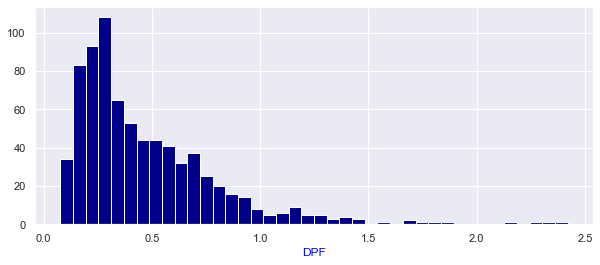

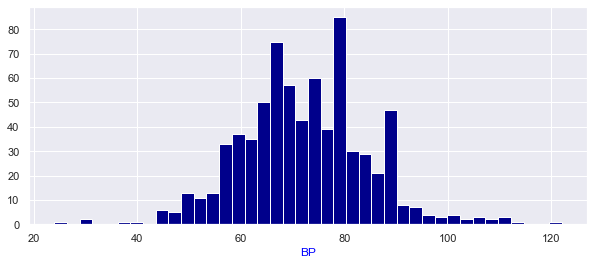

In [21]:
col_name=['glucose', 'BMI', 'insulin', 'skin', 'age', 'preg', 'DPF', 'BP']
def histplot(col):
    plt.figure(figsize=(10,4))
    plt.hist(data=df,x=col,color = 'darkblue' , bins = 40)
    plt.xlabel(col , color = 'blue')
for col in col_name:
    histplot(col)
    

# dealing with missing values

In [22]:
df_mv = pd.DataFrame(df.isnull().sum() , columns = ['count MV'])
df_mv = df_mv[df_mv['count MV']>0]
df_mv = df_mv.sort_values(by = 'count MV' , ascending = False)

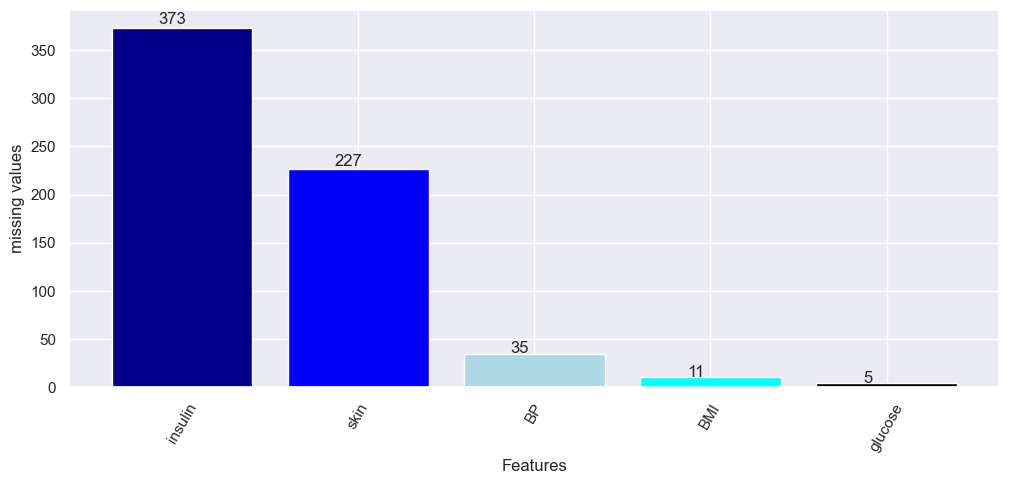

In [23]:
sns.set()
fig ,ax = plt.subplots(figsize=(12,5),dpi = 100)
rects = ax.bar(df_mv.index, df_mv['count MV'], color =['darkblue','blue','lightblue','cyan','black'])
plt.xticks(rotation = 60)
plt.xlabel('Features')
plt.ylabel('missing values')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/3., 1.012*height,
                '%d' % int(height))
autolabel(rects)

In [24]:
for col in df_mv.index.tolist():
    df[col] = df.groupby('class')[col].transform(lambda value : value.fillna(value.median()))

# EDA

In [25]:
df.loc[df["age"] <= 39 , "new_age"] = 'young'

In [26]:
df.loc[(df["age"] <= 59) & (df['age']>=40) , "new_age"] = 'middle age'

In [27]:
df.loc[(df["age"] <= 81) & (df['age']>=60) , "new_age"] = 'elderly'

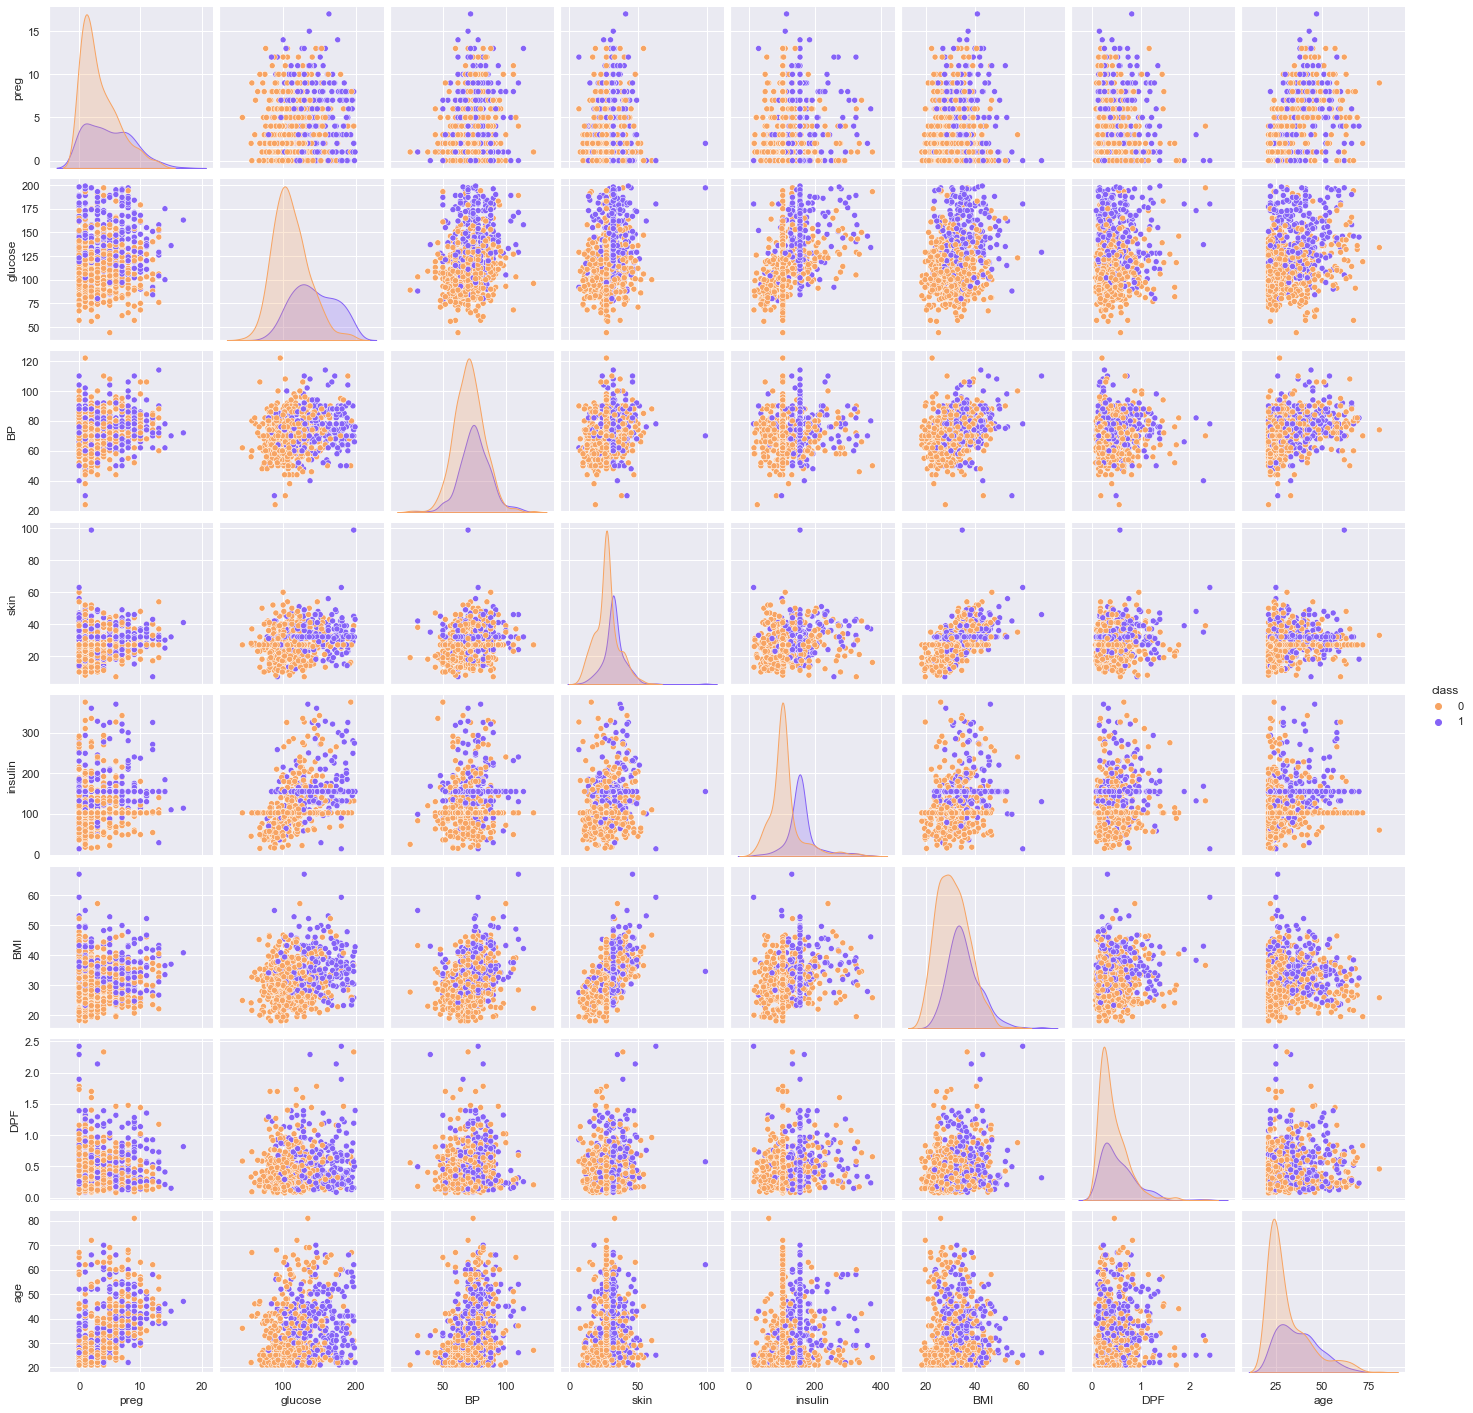

In [28]:
sns.pairplot(data = df , hue = 'class' , palette = ['#F7A463' ,'#8563F7'])

In [29]:
plt.rcParams.update({'font.family':'sans-serif'})

In [30]:
grouped_ages=df[['new_age','class']].groupby(by='new_age').sum()
grouped_ages['class']=round(grouped_ages['class']/df[df['class']==1].shape[0]*100,2)
grouped_ages

,class
new_age,
elderly,3.37
middle age,36.70
young,59.93


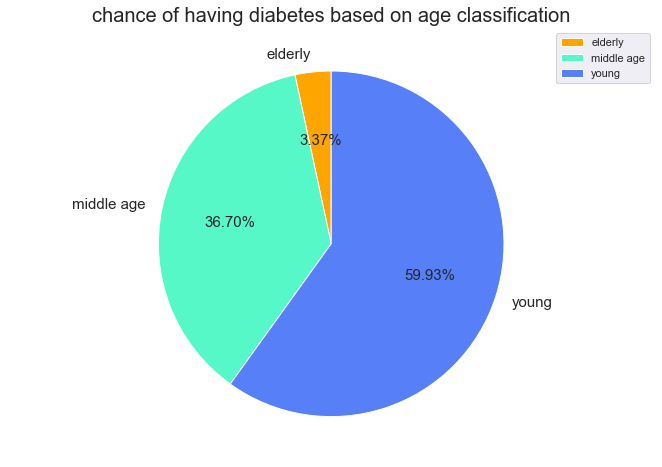

In [31]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1.5 , 1.5])
colors = ['orange','#56f8c7','#567ff8']
ax.axis('equal')
types = ['elderly', 'middle age','young'] 

ax.pie(grouped_ages['class'].values,autopct='%1.2f%%' ,labels = types,colors = colors ,startangle = 90 , textprops = {'fontsize' : 15})

plt.title("chance of having diabetes based on age classification",
          fontsize = 20)
plt.legend( loc='best')

In [32]:
grouped_glucose=df[['new_age','glucose']].groupby(by='new_age').mean()
grouped_glucose

,glucose
new_age,
elderly,138.250000
middle age,130.436782
young,117.967914


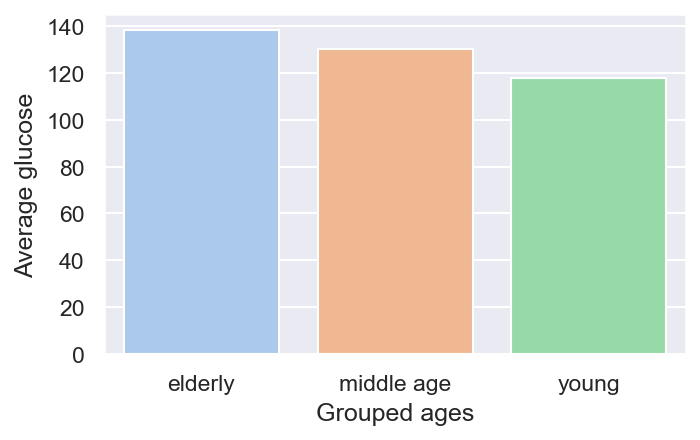

In [33]:
plt.figure(figsize=(5,3) , dpi = 150)
sns.barplot(data = grouped_glucose, x= grouped_glucose.index , y='glucose' , palette = 'pastel')
plt.ylabel('Average glucose')
plt.xlabel('Grouped ages')



SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title


<AxesSubplot:xlabel='age', ylabel='insulin'>

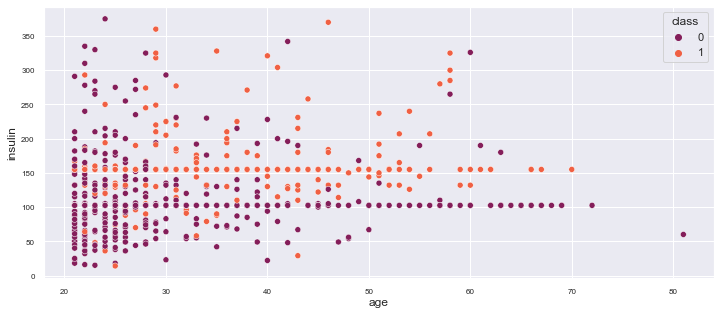

In [34]:
plt.figure(figsize = (12 , 5))
sns.scatterplot(data= df , x = 'age' , y= 'insulin' , hue = 'class' , palette = 'rocket')

<AxesSubplot:xlabel='BMI', ylabel='insulin'>

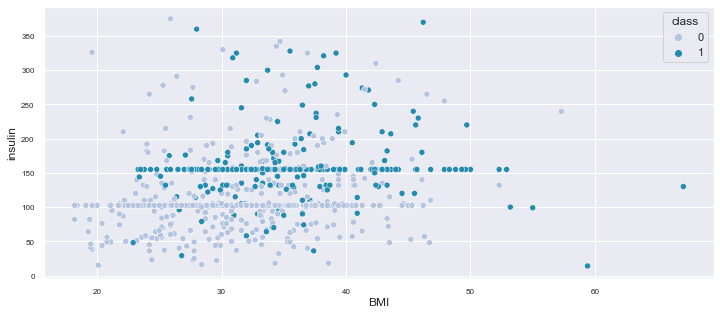

In [35]:
plt.figure(figsize = (12 , 5))
sns.scatterplot(data= df , x = 'BMI' , y= 'insulin' , hue = 'class' ,  palette = 'PuBuGn')

In [36]:
df.loc[(df['BMI']<18.5) , 'BMI_range'] = 'under_weight'
df.loc[(df['BMI']>= 18.5) & (df['BMI']<=24.9), 'BMI_range'] = 'healthy_weight'
df.loc[(df['BMI']>=25) & (df['BMI']<=29.9), 'BMI_range']= 'overweight'
df.loc[(df['BMI']>=30) & (df['BMI']<=39.9), 'BMI_range'] ='1-obese'
df.loc[df['BMI']>=40 , 'BMI_range'] = '2-obese'

In [37]:
grouped_insulin = df[['insulin' , 'BMI_range']].groupby(by = 'BMI_range').mean()
grouped_insulin

,insulin
BMI_range,
1-obese,135.276042
2-obese,149.688776
healthy_weight,102.612745
overweight,115.466480
under_weight,97.375000


In [38]:
grouped_insulin = grouped_insulin.reindex(index = ['under_weight' , 'healthy_weight' , 'overweight' , '1-obese' , '2-obese'])

<AxesSubplot:xlabel='BMI_range', ylabel='insulin'>

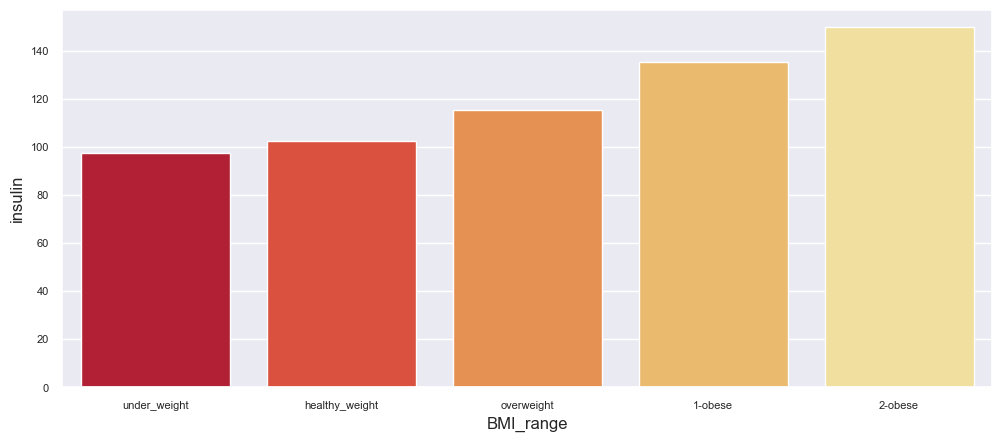

In [39]:
plt.figure(figsize = (12,5) , dpi = 100)
sns.barplot(data = grouped_insulin , x = grouped_insulin.index , y = 'insulin' , palette = 'YlOrRd_r')

<AxesSubplot:xlabel='BMI', ylabel='skin'>

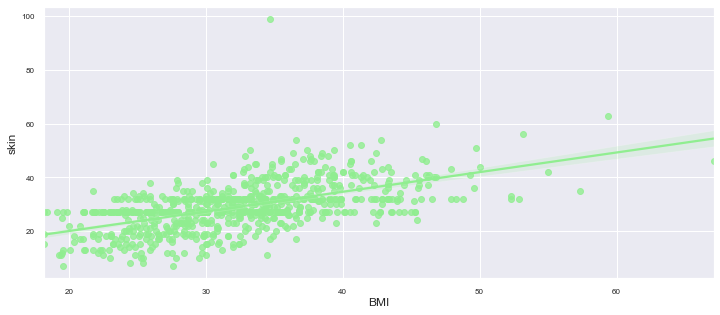

In [40]:
plt.figure(figsize = (12 , 5))
sns.regplot(data= df , x = 'BMI' , y= 'skin' , color = 'lightgreen' )

Text(0, 0.5, 'Density')

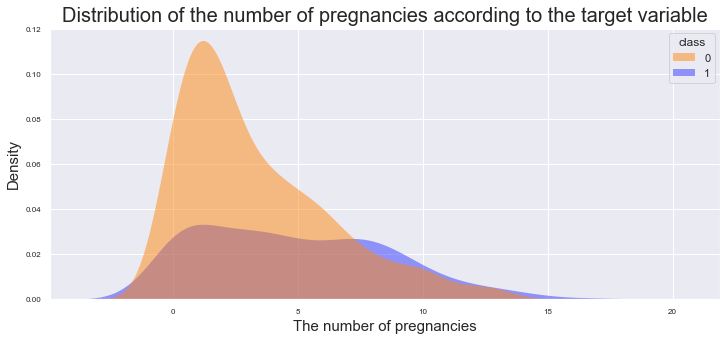

In [41]:
plt.figure(figsize = (12,5))
sns.kdeplot(data= df , x= 'preg' , fill = True , hue = 'class' , palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
plt.title('Distribution of the number of pregnancies according to the target variable' , fontsize = 20)
plt.xlabel('The number of pregnancies',fontsize = 15)
plt.ylabel('Density',fontsize = 15)

In [42]:
df[(df['class']==1) & (df['preg'] >0)]   #was pregnant and have diabets

,preg,glucose,BP,skin,insulin,BMI,DPF,age,class,new_age,BMI_range
1,8,183.0,64.0,32.0,155.0,23.3,0.672,32,1,young,healthy_weight
5,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,young,1-obese
7,2,197.0,70.0,45.0,132.0,30.5,0.158,53,1,middle age,1-obese
8,8,125.0,96.0,32.0,155.0,34.3,0.232,54,1,middle age,1-obese
10,10,168.0,74.0,32.0,155.0,38.0,0.537,34,1,young,1-obese
...,...,...,...,...,...,...,...,...,...,...,...
753,8,154.0,78.0,32.0,155.0,32.4,0.443,45,1,middle age,1-obese
754,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1,young,1-obese
758,6,190.0,92.0,32.0,155.0,35.5,0.278,66,1,elderly,1-obese
760,9,170.0,74.0,31.0,155.0,44.0,0.403,43,1,middle age,2-obese


Text(0.5, 1.0, 'chance of having diabetes based on the number of pregnancies')

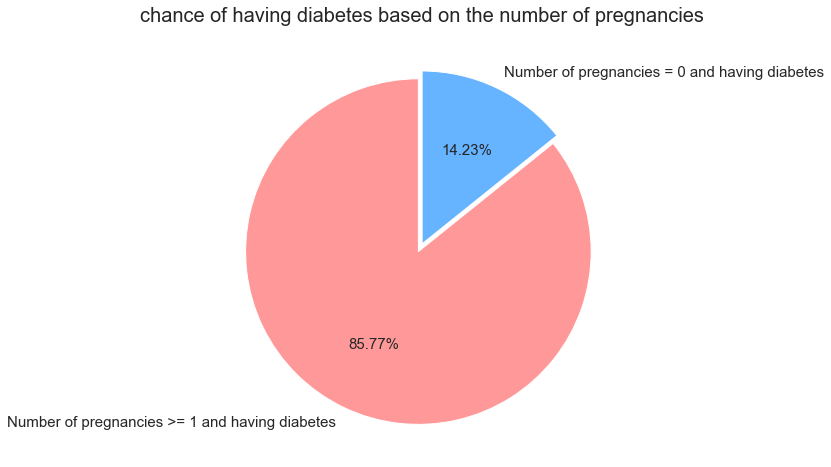

In [43]:
types = ['Number of pregnancies >= 1 and having diabetes', 'Number of pregnancies = 0 and having diabetes'] 
percentc = [df[(df['preg']>=1) & (df['class']==1)].shape[0]/df[df['class']==1].shape[0]*100, 
            df[(df['preg']==0) & (df['class']==1)].shape[0]/df[df['class']==1].shape[0]*100]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1.5 , 1.5])
explode = (0.05 , 0)
colors = ['#ff9999','#66b3ff']
ax.axis('equal')

ax.pie(percentc, labels = types, explode = explode , colors = colors ,
       autopct='%1.2f%%' , startangle = 90 , textprops = {'fontsize' : 15})

plt.title("chance of having diabetes based on the number of pregnancies",
          fontsize = 20)

In [44]:
#percetage of people with more than 6 pregnancies and having diabets
round(df[(df['preg']>=6) & (df['class']==1)].shape[0]/df[df['class']==1].shape[0],2) * 100

41.0

In [45]:
#percetage of people with less than 6 pregnancies and having diabets
round(df[(df['preg']>0) & (df['preg']<6) & (df['class']==1)].shape[0]/df[df['class']==1].shape[0],2) * 100   

45.0

7- Can we say the more you get pregnant the more change is to have higher glucose?

Text(0, 0.5, 'Density')

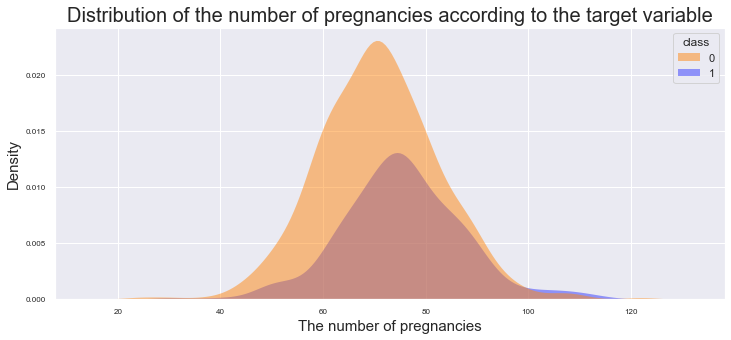

In [46]:
plt.figure(figsize = (12,5))
sns.kdeplot(data= df , x= 'BP' , fill = True , hue = 'class' , palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
plt.title('Distribution of the number of pregnancies according to the target variable' , fontsize = 20)
plt.xlabel('The number of pregnancies',fontsize = 15)
plt.ylabel('Density',fontsize = 15)

Text(0, 0.5, 'Density')

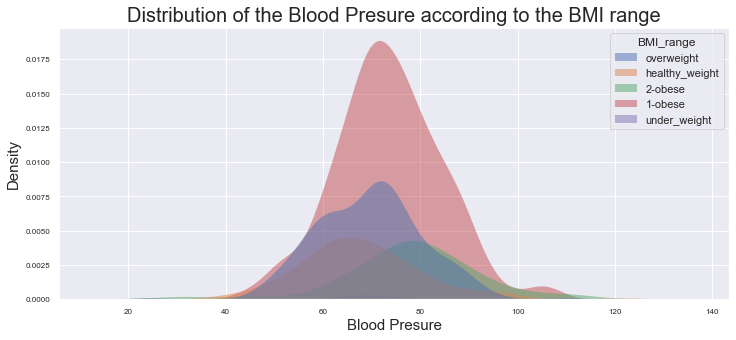

In [47]:
plt.figure(figsize = (12,5))
sns.kdeplot(data= df , x= 'BP' , fill = True , hue = 'BMI_range' , alpha=.5, linewidth=0)
plt.title('Distribution of the Blood Presure according to the BMI range' , fontsize = 20)
plt.xlabel('Blood Presure',fontsize = 15)
plt.ylabel('Density',fontsize = 15)

<AxesSubplot:xlabel='BMI', ylabel='skin'>

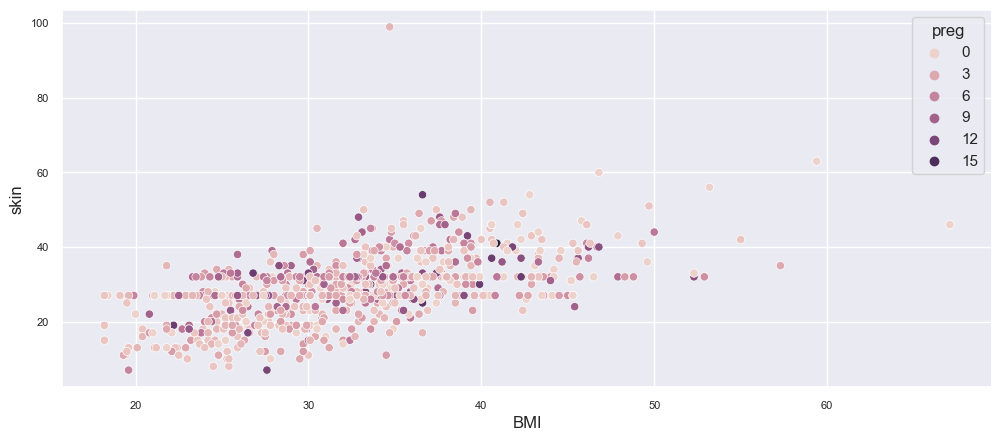

In [49]:
plt.figure(figsize = (12,5) , dpi = 100)
sns.scatterplot(data = df , x = 'BMI' , y = 'skin' , hue = 'preg')

C:\Users\Atena\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Atena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Atena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


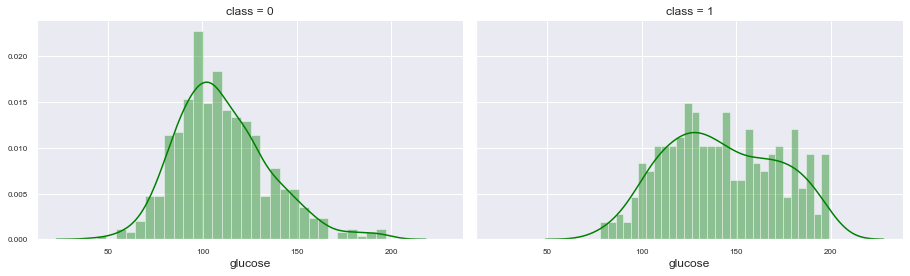

In [50]:
g=sns.FacetGrid(data = df, col = 'class',size=4,aspect=1.6)
g.map(sns.distplot, "glucose", bins =30,color='green') 
plt.show()

C:\Users\Atena\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Atena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Atena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


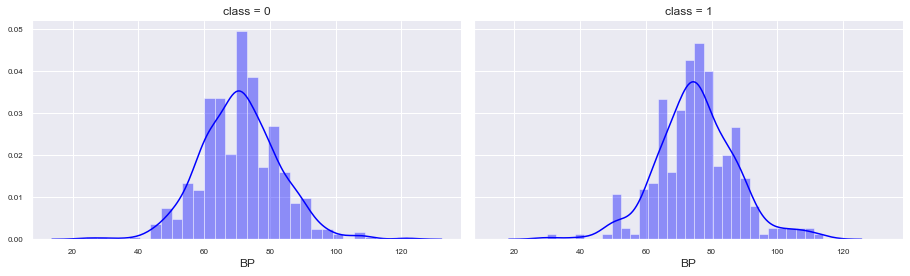

In [51]:
g=sns.FacetGrid(data = df, col = 'class',size=4,aspect=1.6)
g.map(sns.distplot, "BP", bins =30,color='blue') 
plt.show()

C:\Users\Atena\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Atena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Atena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


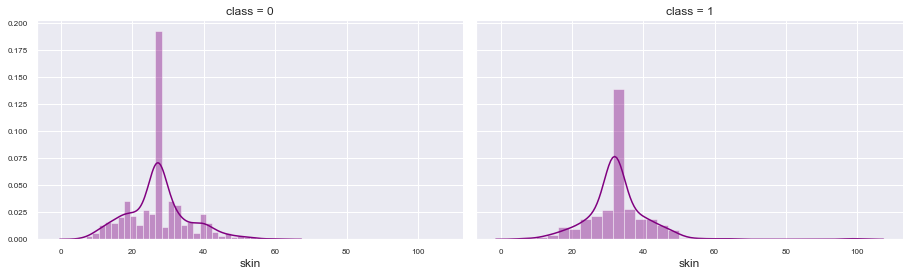

In [52]:
g=sns.FacetGrid(data = df, col = 'class',size=4,aspect=1.6)
g.map(sns.distplot, "skin", bins =30,color='purple') 
plt.show()

C:\Users\Atena\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Atena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Atena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


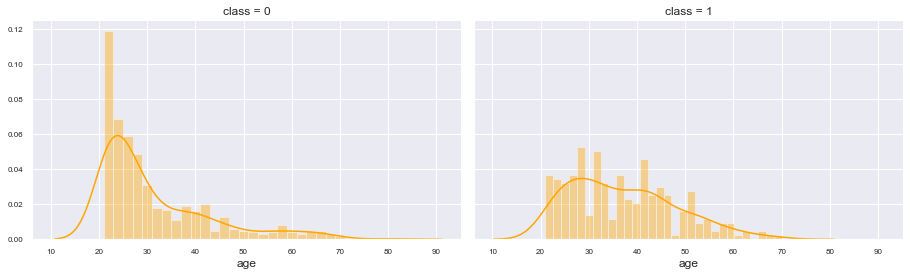

In [53]:
g=sns.FacetGrid(data = df, col = 'class',size=4,aspect=1.6)
g.map(sns.distplot, "age", bins =30,color='orange') 
plt.show()

C:\Users\Atena\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Atena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Atena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


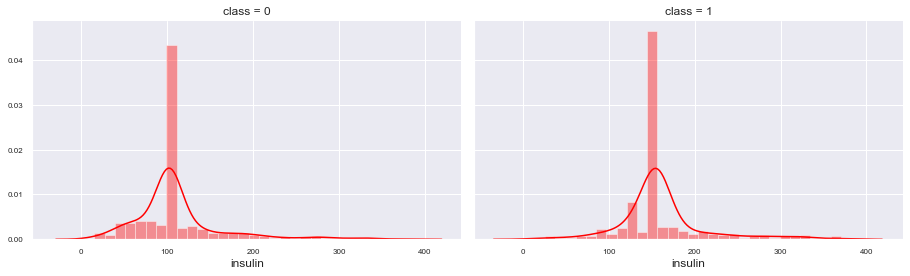

In [54]:
g=sns.FacetGrid(data = df, col = 'class',size=4,aspect=1.6)
g.map(sns.distplot, "insulin", bins =30,color='red' ) 
plt.show()

C:\Users\Atena\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Atena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Atena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


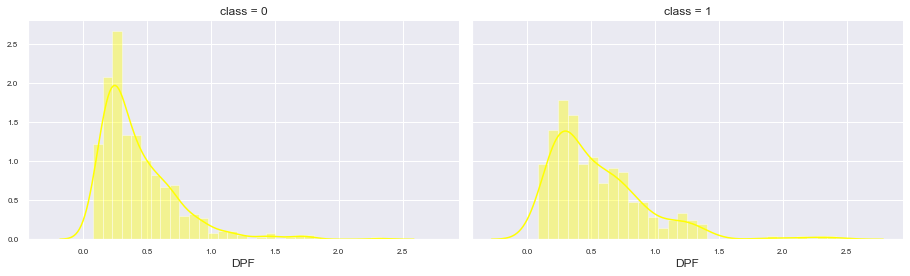

In [55]:
g=sns.FacetGrid(data = df, col = 'class',size=4,aspect=1.6)
g.map(sns.distplot, "DPF", bins =30,color='yellow') 
plt.show()

# faeture extraction

In [56]:
df.drop(['new_age','BMI_range'],axis = 1 , inplace = True)

In [131]:
x = df.drop('class' , axis = 1)

In [132]:
y = df['class']

In [59]:
from sklearn.decomposition import PCA

In [60]:
expln_variance = []
for i in range(1,9):
    pca = PCA(n_components = i)
    pca.fit(x)
    expln_variance.append(sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Explained variance')

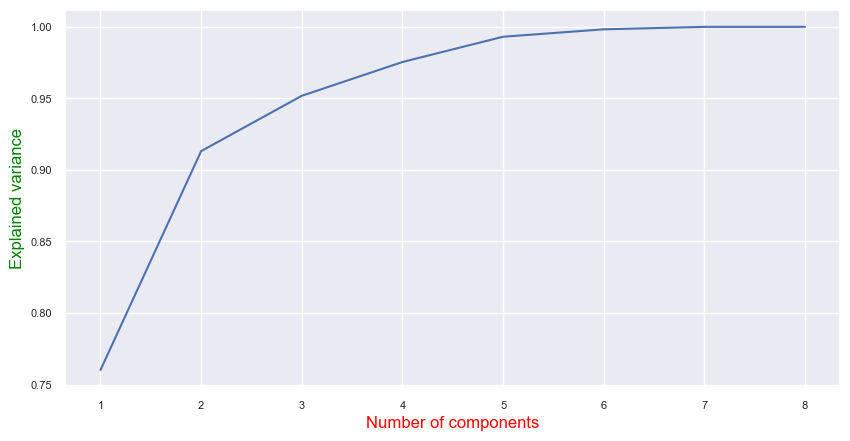

In [61]:
plt.figure(figsize = (10,5) , dpi= 100)
plt.plot(range(1,9) , expln_variance)
plt.xlabel('Number of components' , color = 'red')
plt.ylabel('Explained variance' , color = 'green')

In [133]:
pca_x = PCA(n_components=5).fit_transform(x)

# Balance The data

In [63]:
df['class'].value_counts()

0    500
1    267
Name: class, dtype: int64

In [134]:
oversample = SMOTE(k_neighbors=2 , random_state = 101)
pca_x, y = oversample.fit_resample(pca_x, y)

In [135]:
x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size = 0.3,random_state=101)

In [136]:
scaler = StandardScaler()

In [137]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# knn

In [68]:
param_grid_knn = {'n_neighbors':range(1,30),
                 'weights':['uniform', 'distance'],
                 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

In [69]:
cv = KFold(n_splits=3, shuffle=True, random_state=1)

In [70]:
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid_knn ,scoring = 'accuracy',cv=cv )
grid_knn.fit(x_train , y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [138]:
print(classification_report(y_test , grid_knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       142
           1       0.89      0.91      0.90       158

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [141]:
df_acc_with_P_B = pd.DataFrame({'Model':['KNN','SVM','DT','MLP','RF','NB','LR','MV'],
                               'Acc':[accuracy_score(y_test , grid_knn.predict(x_test)),
                                      accuracy_score(y_test , grid_svm.predict(x_test)),
                                      accuracy_score(y_test , grid_tree.predict(x_test)),
                                      accuracy_score(y_test , grid_mlp.predict(x_test)),
                                      accuracy_score(y_test , grid_rf.predict(x_test)),
                                      accuracy_score(y_test , grid_nb.predict(x_test)),
                                      accuracy_score(y_test , grid_lr.predict(x_test)),
                                      accuracy_score(y_test , vm1.predict(x_test))]})

# SVM

In [72]:
param_grid_svm={'C':[0.001,0.01,0.1,1,2,3],
           'degree':range(1,20),
           'gamma':['scale','auto'],
           'kernel':['rbf','linear', 'poly', 'sigmoid']}

In [73]:
grid_svm = GridSearchCV(SVC() , param_grid_svm , 
                       scoring = 'accuracy',cv = cv)

In [74]:
grid_svm.fit(x_train , y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2, 3],
                         'degree': range(1, 20), 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy')

In [75]:
print(classification_report(y_test , grid_svm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       142
           1       0.88      0.92      0.90       158

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



# DT

In [76]:
param_grid_dt={'criterion':['gini','entropy','log_loss'],
                 'max_depth':range(1,15),
                 'splitter':['best','random'],
           'max_features':["auto", "sqrt", "log2"]}

In [77]:
grid_tree=GridSearchCV(DecisionTreeClassifier(random_state = 101),param_grid_dt,
                  cv=cv,scoring='accuracy')

In [78]:
grid_tree.fit(x_train , y_train)

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 15),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [79]:
print(classification_report(y_test , grid_tree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       142
           1       0.87      0.86      0.87       158

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



# MLP

In [80]:
param_grid_mlp = {'hidden_layer_sizes':[50,100,150,200] , 
                   'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                   'solver' : ['lbfgs','sgd','adam'],
                   'learning_rate' : ['constant', 'invscaling', 'invscaling']
                   }

In [81]:
grid_mlp=GridSearchCV(MLPClassifier(random_state = 1),param_grid_mlp,
                  cv=cv,scoring='accuracy')

In [82]:
grid_mlp.fit(x_train, y_train)

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [50, 100, 150, 200],
                         'learning_rate': ['constant', 'invscaling',
                                           'invscaling'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy')

In [83]:
print(classification_report(y_test , grid_mlp.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       142
           1       0.87      0.89      0.88       158

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



# RF

In [84]:
param_grid_rf = {'criterion':['gini','entropy','log_loss'],
                'n_estimators':np.arange(10,150,20),
                'max_depth':np.arange(2,11,2),
                'max_features':['sqrt', 'log2']}

In [85]:
grid_rf = GridSearchCV(RandomForestClassifier(random_state = 356) , param_grid_rf ,scoring = 'accuracy' ,cv = cv)
grid_rf.fit(x_train , y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(random_state=356),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 2,  4,  6,  8, 10]),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130])},
             scoring='accuracy')

In [86]:
print(classification_report(y_test , grid_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       142
           1       0.91      0.92      0.91       158

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



# NB

In [87]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)}

In [88]:
grid_nb = GridSearchCV(GaussianNB() , param_grid_nb ,scoring = 'accuracy' ,cv = cv)
grid_nb.fit(x_train , y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.328...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [89]:
print(classification_report(y_test , grid_nb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       142
           1       0.85      0.79      0.82       158

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



# LR

In [90]:
param_grid_lr ={'penalty':['l1','l2','elasticnet'],
                'C' : [0.5 , 1 , 1.5 , 2],
                'solver':['newton-cg', 'lbfgs','liblinear', 'sag', 'saga'],
                'multi_class':['auto', 'ovr', 'multinomial'],
                'l1_ratio':[0,1]}

In [91]:
grid_lr = GridSearchCV(LogisticRegression() , param_grid_lr ,scoring = 'accuracy' ,cv = cv)
grid_lr.fit(x_train , y_train)

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
552 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If t

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 1.5, 2], 'l1_ratio': [0, 1],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [92]:
print(classification_report(y_test , grid_lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       142
           1       0.83      0.78      0.81       158

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.81      0.80      0.80       300



# Majority Vote

In [93]:
vm1 = VotingClassifier(estimators=[('LR', grid_lr), ('DT', grid_tree), ('NB', grid_nb),('SVM',grid_svm),('RF',grid_rf),('MLP',grid_mlp)],voting='hard')

In [94]:
vm1.fit(x_train, y_train)

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

VotingClassifier(estimators=[('LR',
                              GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
                                           estimator=LogisticRegression(),
                                           param_grid={'C': [0.5, 1, 1.5, 2],
                                                       'l1_ratio': [0, 1],
                                                       'multi_class': ['auto',
                                                                       'ovr',
                                                                       'multinomial'],
                                                       'penalty': ['l1', 'l2',
                                                                   'elasticnet'],
                                                       'solver': ['newton-cg',
                                                                  'lbfgs',
                                                                  'liblinear',
                                                                  'sag',
                                                                  'saga']},
                                           scoring='accuracy')),
                             ('DT',
                              GridSearchCV(...
                                                       'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130])},
                                           scoring='accuracy')),
                             ('MLP',
                              GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
                                           estimator=MLPClassifier(random_state=1),
                                           param_grid={'activation': ['identity',
                                                                      'logistic',
                                                                      'tanh',
                                                                      'relu'],
                                                       'hidden_layer_sizes': [50,
                                                                              100,
                                                                              150,
                                                                              200],
                                                       'learning_rate': ['constant',
                                                                         'invscaling',
                                                                         'invscaling'],
                                                       'solver': ['lbfgs',
                                                                  'sgd',
                                                                  'adam']},
                                           scoring='accuracy'))])

In [95]:
print(classification_report(y_test , vm1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       142
           1       0.90      0.89      0.90       158

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



# Not PCA and Not Balance

In [142]:
x = df.drop('class',axis = 1)
y = df['class']

In [143]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=101)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# knn with no balance and no pca

In [101]:
grid_knn_npnb = GridSearchCV(KNeighborsClassifier(),param_grid_knn ,scoring = 'accuracy',cv=cv )
grid_knn_npnb.fit(x_train , y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [102]:
print(classification_report(y_test , grid_knn_npnb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       150
           1       0.82      0.75      0.79        81

    accuracy                           0.86       231
   macro avg       0.85      0.83      0.84       231
weighted avg       0.86      0.86      0.86       231



# svm with no balance and no pca

In [103]:
grid_svm_npnb = GridSearchCV(SVC() , param_grid_svm , 
                       scoring = 'accuracy',cv = cv)
grid_svm_npnb.fit(x_train , y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2, 3],
                         'degree': range(1, 20), 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy')

In [104]:
print(classification_report(y_test , grid_svm_npnb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       150
           1       0.78      0.80      0.79        81

    accuracy                           0.85       231
   macro avg       0.84      0.84      0.84       231
weighted avg       0.85      0.85      0.85       231



# DT

In [105]:
grid_tree_npnb=GridSearchCV(DecisionTreeClassifier(random_state = 1),param_grid_dt,
                  cv=cv,scoring='accuracy')
grid_tree_npnb.fit(x_train , y_train)

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 15),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [106]:
print(classification_report(y_test , grid_tree_npnb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       150
           1       0.69      0.81      0.75        81

    accuracy                           0.81       231
   macro avg       0.79      0.81      0.80       231
weighted avg       0.82      0.81      0.81       231



# MLP

In [107]:
grid_mlp_npnb=GridSearchCV(MLPClassifier(random_state = 1),param_grid_mlp,
                  cv=cv,scoring='accuracy')
grid_mlp_npnb.fit(x_train , y_train)

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [50, 100, 150, 200],
                         'learning_rate': ['constant', 'invscaling',
                                           'invscaling'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy')

In [108]:
print(classification_report(y_test , grid_mlp_npnb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       150
           1       0.77      0.77      0.77        81

    accuracy                           0.84       231
   macro avg       0.82      0.82      0.82       231
weighted avg       0.84      0.84      0.84       231



# RF

In [109]:
grid_rf_npnb = GridSearchCV(RandomForestClassifier(random_state = 356) , param_grid_rf ,scoring = 'accuracy' ,cv = cv)
grid_rf_npnb.fit(x_train , y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(random_state=356),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 2,  4,  6,  8, 10]),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130])},
             scoring='accuracy')

In [110]:
print(classification_report(y_test , grid_rf_npnb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       150
           1       0.82      0.78      0.80        81

    accuracy                           0.86       231
   macro avg       0.85      0.84      0.85       231
weighted avg       0.86      0.86      0.86       231



# NB

In [111]:
grid_nb_npnb = GridSearchCV(GaussianNB() , param_grid_nb ,scoring = 'accuracy' ,cv = cv)
grid_nb_npnb.fit(x_train , y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.328...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [112]:
print(classification_report(y_test , grid_nb_npnb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       150
           1       0.71      0.68      0.70        81

    accuracy                           0.79       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231



# LR

In [113]:
grid_lr_npnb = GridSearchCV(LogisticRegression() , param_grid_lr ,scoring = 'accuracy' ,cv = cv)
grid_lr_npnb.fit(x_train , y_train)

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 1.5, 2], 'l1_ratio': [0, 1],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [114]:
print(classification_report(y_test , grid_nb_npnb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       150
           1       0.71      0.68      0.70        81

    accuracy                           0.79       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231



# VM

In [115]:
vm1_npnb = VotingClassifier(estimators=[('LR', grid_lr_npnb), ('NB', grid_nb_npnb),('SVM',grid_svm_npnb),('RF',grid_rf_npnb),('MLP',grid_mlp_npnb)],voting='hard')
vm1_npnb.fit(x_train,y_train)

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.77236206        nan 0.77608646 0.77981085
 0.77981085 0.78168351 0.77981085 0.77981085        nan        nan
        nan        nan 0.77981085        nan        nan 0.77236206
        nan 0.77608646 0.77981085 0.77981085 0.78168351 0.77981085
 0.77981085        nan        nan        nan        nan 0.77981085
        nan        nan        nan        nan 0.77608646 0.77981085
 0.77981085        nan 0.77981085 0.77981085        nan        nan
        nan        nan 0.77981085        nan        nan 0.77236206
        nan 0.77608646 0.77981085 0.77981085 0.78168351 0.77981085
 0.77981085        nan        nan        nan        nan 0.77608646
        nan        nan 0.77236206        nan 0.77608646 0.77981085
 0.77981085 0.78168351 0.77981085 0.77981085        nan        nan
        nan        nan 0.77608646        nan        n

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

VotingClassifier(estimators=[('LR',
                              GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
                                           estimator=LogisticRegression(),
                                           param_grid={'C': [0.5, 1, 1.5, 2],
                                                       'l1_ratio': [0, 1],
                                                       'multi_class': ['auto',
                                                                       'ovr',
                                                                       'multinomial'],
                                                       'penalty': ['l1', 'l2',
                                                                   'elasticnet'],
                                                       'solver': ['newton-cg',
                                                                  'lbfgs',
                                                                  'liblinear',
                                                                  'sag',
                                                                  'saga']},
                                           scoring='accuracy')),
                             ('NB',
                              GridSearchCV(...
                                                       'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130])},
                                           scoring='accuracy')),
                             ('MLP',
                              GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
                                           estimator=MLPClassifier(random_state=1),
                                           param_grid={'activation': ['identity',
                                                                      'logistic',
                                                                      'tanh',
                                                                      'relu'],
                                                       'hidden_layer_sizes': [50,
                                                                              100,
                                                                              150,
                                                                              200],
                                                       'learning_rate': ['constant',
                                                                         'invscaling',
                                                                         'invscaling'],
                                                       'solver': ['lbfgs',
                                                                  'sgd',
                                                                  'adam']},
                                           scoring='accuracy'))])

In [116]:
print(classification_report(y_test , vm1_npnb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       150
           1       0.79      0.78      0.78        81

    accuracy                           0.85       231
   macro avg       0.83      0.83      0.83       231
weighted avg       0.85      0.85      0.85       231



In [145]:
df_acc_without_P_B = pd.DataFrame({'Model':['KNN','SVM','DT','MLP','RF','NB','LR','MV'],
                               'Acc':[accuracy_score(y_test , grid_knn_npnb.predict(x_test)),
                                      accuracy_score(y_test , grid_svm_npnb.predict(x_test))
                                      ,accuracy_score(y_test , grid_tree_npnb.predict(x_test)),
                                      accuracy_score(y_test , grid_mlp_npnb.predict(x_test)),
                                      accuracy_score(y_test , grid_rf_npnb.predict(x_test)),
                                      accuracy_score(y_test , grid_nb_npnb.predict(x_test)),
                                      accuracy_score(y_test , grid_lr_npnb.predict(x_test)),
                                      accuracy_score(y_test , vm1_npnb.predict(x_test))]})

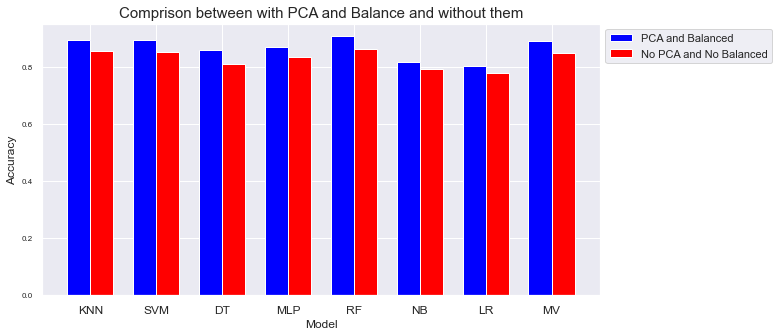

In [146]:
s = "PCA and Balanced|No PCA and No Balanced".split("|")


bar_width = 0.35

fig, ax = plt.subplots()
P_B = ax.bar(np.arange(8), df_acc_with_P_B['Acc'], bar_width,
                label="PCA and Balanced" , color = 'blue')

N_P_B = ax.bar(np.arange(8)+bar_width, df_acc_without_P_B["Acc"],
                 bar_width, label="No PCA and No Balanced",color = 'red' )
#ax.set_figure( = (12,5))
fig.set_size_inches(10, 5)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comprison between with PCA and Balance and without them' , size = 15)
ax.set_xticks(np.arange(8) + bar_width / 2)
ax.set_xticklabels(['KNN','SVM','DT','MLP','RF','NB','LR','MV'],size = 12)
ax.legend(bbox_to_anchor=(1, 1));

# Just Using PCA and Do Not Balance The Data

# knn

In [147]:
x = df.drop('class',axis = 1)
y = df['class']


pca_x = PCA(n_components=6).fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size = 0.3,random_state=101)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [148]:
grid_knn_p = GridSearchCV(KNeighborsClassifier(),param_grid_knn ,scoring = 'accuracy',cv=cv )
grid_knn_p.fit(x_train , y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [149]:
print(classification_report(y_test , grid_knn_p.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       150
           1       0.85      0.77      0.81        81

    accuracy                           0.87       231
   macro avg       0.86      0.85      0.85       231
weighted avg       0.87      0.87      0.87       231



# svm

In [150]:
grid_svm_p = GridSearchCV(SVC() , param_grid_svm , 
                       scoring = 'accuracy',cv = cv)
grid_svm_p.fit(x_train , y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2, 3],
                         'degree': range(1, 20), 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy')

In [151]:
print(classification_report(y_test , grid_svm_p.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       150
           1       0.82      0.80      0.81        81

    accuracy                           0.87       231
   macro avg       0.86      0.85      0.86       231
weighted avg       0.87      0.87      0.87       231



# DT

In [152]:
grid_tree_p=GridSearchCV(DecisionTreeClassifier(random_state = 1),param_grid_dt,
                  cv=cv,scoring='accuracy')
grid_tree_p.fit(x_train , y_train)

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 15),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [153]:
print(classification_report(y_test , grid_tree_p.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       150
           1       0.73      0.78      0.75        81

    accuracy                           0.82       231
   macro avg       0.80      0.81      0.81       231
weighted avg       0.83      0.82      0.82       231



# MLP

In [154]:
grid_mlp_p=GridSearchCV(MLPClassifier(random_state = 1),param_grid_mlp,
                  cv=cv,scoring='accuracy')
grid_mlp_p.fit(x_train , y_train)

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [50, 100, 150, 200],
                         'learning_rate': ['constant', 'invscaling',
                                           'invscaling'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy')

In [155]:
print(classification_report(y_test , grid_mlp_p.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       150
           1       0.80      0.81      0.81        81

    accuracy                           0.87       231
   macro avg       0.85      0.85      0.85       231
weighted avg       0.87      0.87      0.87       231



# RF

In [156]:
grid_rf_p = GridSearchCV(RandomForestClassifier(random_state = 356) , param_grid_rf ,scoring = 'accuracy' ,cv = cv)
grid_rf_p.fit(x_train , y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(random_state=356),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 2,  4,  6,  8, 10]),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130])},
             scoring='accuracy')

In [157]:
print(classification_report(y_test , grid_rf_p.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       150
           1       0.88      0.86      0.87        81

    accuracy                           0.91       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.91      0.91      0.91       231



# NB

In [158]:
grid_nb_p = GridSearchCV(GaussianNB() , param_grid_nb ,scoring = 'accuracy' ,cv = cv)
grid_nb_p.fit(x_train , y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.328...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [159]:
print(classification_report(y_test , grid_nb_p.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.66      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231



# LR

In [160]:
grid_lr_p = GridSearchCV(LogisticRegression() , param_grid_lr ,scoring = 'accuracy' ,cv = cv)
grid_lr_p.fit(x_train , y_train)

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 1.5, 2], 'l1_ratio': [0, 1],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [161]:
print(classification_report(y_test , grid_lr_p.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       150
           1       0.73      0.60      0.66        81

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



# vm

In [162]:
vm1_p = VotingClassifier(estimators=[('LR', grid_lr_p), ('NB', grid_nb_p),('SVM',grid_svm_p),('RF',grid_rf_p),('MLP',grid_mlp_p)],voting='hard')
vm1_p.fit(x_train,y_train)

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packag

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Atena\anaconda3\lib\site-packages\sklearn\neural_network\_multi

VotingClassifier(estimators=[('LR',
                              GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
                                           estimator=LogisticRegression(),
                                           param_grid={'C': [0.5, 1, 1.5, 2],
                                                       'l1_ratio': [0, 1],
                                                       'multi_class': ['auto',
                                                                       'ovr',
                                                                       'multinomial'],
                                                       'penalty': ['l1', 'l2',
                                                                   'elasticnet'],
                                                       'solver': ['newton-cg',
                                                                  'lbfgs',
                                                                  'liblinear',
                                                                  'sag',
                                                                  'saga']},
                                           scoring='accuracy')),
                             ('NB',
                              GridSearchCV(...
                                                       'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130])},
                                           scoring='accuracy')),
                             ('MLP',
                              GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
                                           estimator=MLPClassifier(random_state=1),
                                           param_grid={'activation': ['identity',
                                                                      'logistic',
                                                                      'tanh',
                                                                      'relu'],
                                                       'hidden_layer_sizes': [50,
                                                                              100,
                                                                              150,
                                                                              200],
                                                       'learning_rate': ['constant',
                                                                         'invscaling',
                                                                         'invscaling'],
                                                       'solver': ['lbfgs',
                                                                  'sgd',
                                                                  'adam']},
                                           scoring='accuracy'))])

In [163]:
print(classification_report(y_test , vm1_p.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       150
           1       0.83      0.80      0.82        81

    accuracy                           0.87       231
   macro avg       0.86      0.86      0.86       231
weighted avg       0.87      0.87      0.87       231



In [164]:
df_acc_with_P = pd.DataFrame({'Model':['KNN','SVM','DT','MLP','RF','NB','LR','MV'],
                               'Acc':[accuracy_score(y_test , grid_knn_p.predict(x_test)),
                                      accuracy_score(y_test , grid_svm_p.predict(x_test))
                                      ,accuracy_score(y_test , grid_tree_p.predict(x_test)),
                                      accuracy_score(y_test , grid_mlp_p.predict(x_test)),
                                      accuracy_score(y_test , grid_rf_p.predict(x_test)),
                                      accuracy_score(y_test , grid_nb_p.predict(x_test)),
                                      accuracy_score(y_test , grid_lr_p.predict(x_test)),
                                      accuracy_score(y_test , vm1_p.predict(x_test))]})

In [165]:
df_acc_with_P['Acc']=round(df_acc_with_P['Acc'],2)

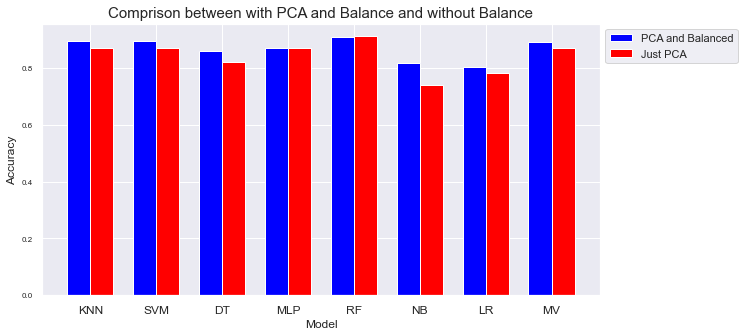

In [167]:
s = "PCA and Balanced|Just PCA and Dont Balance The Data".split("|")


bar_width = 0.35

fig, ax = plt.subplots()
P_B = ax.bar(np.arange(8), df_acc_with_P_B['Acc'], bar_width,
                label="PCA and Balanced" , color = 'blue')

N_P_B = ax.bar(np.arange(8)+bar_width, df_acc_with_P["Acc"],
                 bar_width, label="Just PCA",color = 'red' )
#ax.set_figure( = (12,5))
fig.set_size_inches(10, 5)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comprison between with PCA and Balance and without Balance' , size = 15)
ax.set_xticks(np.arange(8) + bar_width / 2)
ax.set_xticklabels(['KNN','SVM','DT','MLP','RF','NB','LR','MV'],size = 12)
ax.legend(bbox_to_anchor=(1, 1));

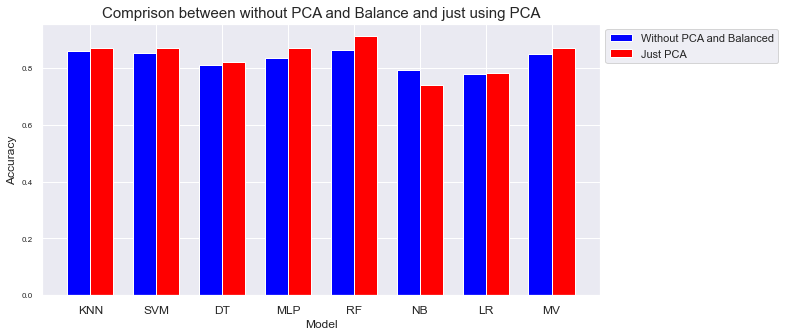

In [169]:
s = "Not PCA and Not Balanced|Just PCA and Dont Balance The Data".split("|")


bar_width = 0.35

fig, ax = plt.subplots()
P_B = ax.bar(np.arange(8), df_acc_without_P_B['Acc'], bar_width,
                label="Without PCA and Balanced" , color = 'blue')

N_P_B = ax.bar(np.arange(8)+bar_width, df_acc_with_P["Acc"],
                 bar_width, label="Just PCA",color = 'red' )
#ax.set_figure( = (12,5))
fig.set_size_inches(10, 5)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comprison between without PCA and Balance and just using PCA' , size = 15)
ax.set_xticks(np.arange(8) + bar_width / 2)
ax.set_xticklabels(['KNN','SVM','DT','MLP','RF','NB','LR','MV'],size = 12)
ax.legend(bbox_to_anchor=(1, 1));